In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn import preprocessing
from scipy.stats import skew
from scipy.stats import boxcox
from sklearn.ensemble import RandomForestClassifier 
import seaborn as sns

%matplotlib inline


In [2]:
# https://www.prosper.com/welcome/fee_history.aspx
# prosper makes money from the closing fee upfront from borrower (BorrowerRate - LenderYield) * LoanAmount 
# and the servicing fee from the lender (LP_ServiceFees)
# late fee from the borrower is passed onto the lender 
# collection fee from the agency is passed onto the lender

In [3]:
df = pd.read_csv("prosperLoanData.csv") #Reading the dataset in a dataframe using Pandas

In [4]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [6]:
df.dtypes

ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64
IsBorrowerHom

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [8]:
#check for missing values
#can conclude from variable definitions 29084 out of 113937 loans were made before July 2009
#df.apply(lambda x: sum(x.isnull()),axis=0) 
df.isnull().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

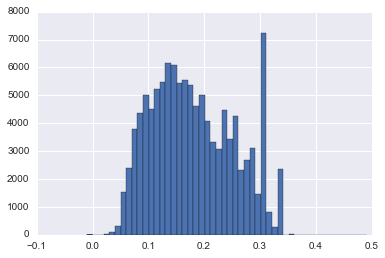

In [9]:
#df['LenderYield'].value_counts()
#df.LenderYield.hist(bins=50)
df['LenderYield'].hist(bins=50)

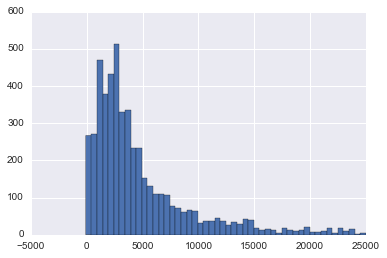

In [10]:
defaulted = df[df['LoanStatus']=='Defaulted']
#defaulted['LenderYield'].hist(bins=50)
defaulted['LP_GrossPrincipalLoss'].hist(bins=50)

In [11]:
df['LP_InterestandFees'].describe() #looks like there are negative fees

count    113937.000000
mean       1077.542901
std        1183.414168
min          -2.349900
25%         274.870000
50%         700.840100
75%        1458.540000
max       15617.030000
Name: LP_InterestandFees, dtype: float64

In [12]:
df[df['LP_InterestandFees'] < 0].transpose() # examine negative fee loans

,28384,91184
ListingKey,34CD3587284005601C13ED3,5FB33596391582382D26742
ListingNumber,880346,1049521
ListingCreationDate,2013-08-26 13:29:03.487000000,2013-12-11 18:13:10.023000000
CreditGrade,NaN,NaN
Term,36,36
LoanStatus,Chargedoff,Completed
ClosedDate,2014-01-28 00:00:00,2013-12-18 00:00:00
BorrowerAPR,0.32538,0.19859
BorrowerRate,0.2859,0.162
LenderYield,0.2759,0.152


In [13]:
df.loc[df['LP_InterestandFees'] <0, ['LP_InterestandFees']] = 0  #set 2 loans with negative fees to 0

In [14]:
df[df['LP_InterestandFees']==0]['LP_InterestandFees'].count() #6223 loans made zero fees + 2 we adjusted

6225

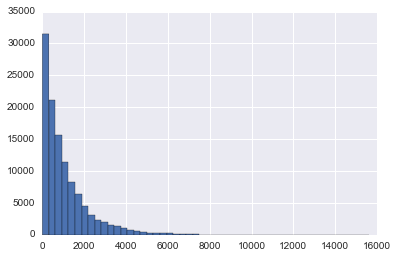

In [15]:
df['LP_InterestandFees'].hist(bins=50)  # heavy positive skew 

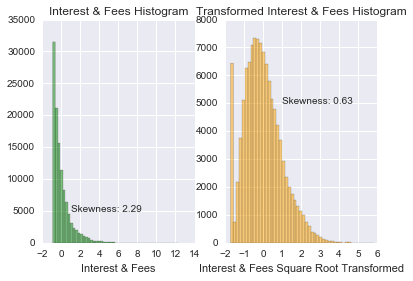

In [16]:
#calculate the skewness
Fees = preprocessing.scale(df['LP_InterestandFees'])
FeesScaled = preprocessing.scale(np.sqrt(df['LP_InterestandFees']))
skew1 = skew(Fees)
skew2 = skew(FeesScaled)

#draw it
figure = plt.figure()
figure.add_subplot(121)
plt.hist(Fees, facecolor='green', alpha = .5, bins=50)
plt.xlabel("Interest & Fees") 
plt.title("Interest & Fees Histogram") 
plt.text(1,5000,"Skewness: {0:.2f}".format(skew1)) 

figure.add_subplot(122)
plt.hist(FeesScaled, facecolor='orange', alpha =.5, bins=50)
plt.xlabel("Interest & Fees Square Root Transformed") 
plt.title("Transformed Interest & Fees Histogram") 
plt.text(1,5000,"Skewness: {0:.2f}".format(skew2))
plt.show()

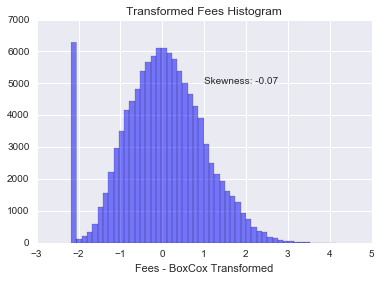

In [17]:
#tried boxcox transformation and received the best results. skewness of -0.07
#https://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html

FeesBoxCox= preprocessing.scale(boxcox(df['LP_InterestandFees']+1)[0])
skew3 = skew(FeesBoxCox)
   
plt.hist(FeesBoxCox,facecolor='blue',  alpha = .5, bins=50) 
plt.xlabel("Fees - BoxCox Transformed") 
plt.title("Transformed Fees Histogram") 
plt.text(1,5000,"Skewness: {0:.2f}".format(skew3)) 
plt.show()

# good thing random forests do not require normality

In [18]:
#Prosper notes that credit grade available until July 2009. not all values are filled in 
#sns.barplot(x = df.Year, y=df.CreditGrade.isnull().sum())
#revenue.pivot_table(index=['BorrowerState'],values=["TotalFeeDollar"],aggfunc=[np.sum,len], fill_value=0,margins=True)

df.CreditGrade.value_counts(dropna=False)

NaN    84984
C       5649
D       5153
B       4389
AA      3509
HR      3508
A       3315
E       3289
NC       141
Name: CreditGrade, dtype: int64

In [19]:
#prosper score only available from July 2009 onward. all values are filled
#sns.barplot(x = df.Year, y=df.ProsperScore.isnull().value_counts(dropna=False))
df.ProsperScore.value_counts(dropna=False)

NaN      29084
 4.0     12595
 6.0     12278
 8.0     12053
 7.0     10597
 5.0      9813
 3.0      7642
 9.0      6911
 2.0      5766
 10.0     4750
 11.0     1456
 1.0       992
Name: ProsperScore, dtype: int64

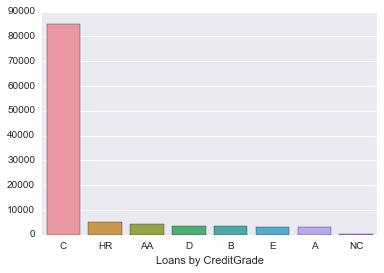

In [20]:
# bar plot loans by credit grade
sns.barplot(x = df['CreditGrade'].unique(), y=df['CreditGrade'].value_counts(dropna=False).values)
plt.xlabel('Loans by CreditGrade')
sns.despine()


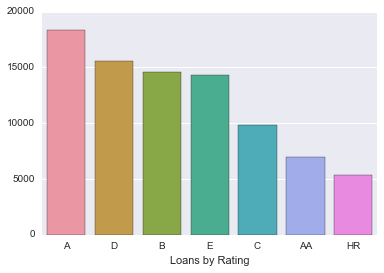

In [21]:
# bar plot loans by prosper rating
sns.barplot(x = df['ProsperRating (Alpha)'].unique(), y=df['ProsperRating (Alpha)'].value_counts(dropna=False).values)
plt.xlabel('Loans by Rating')
sns.despine()

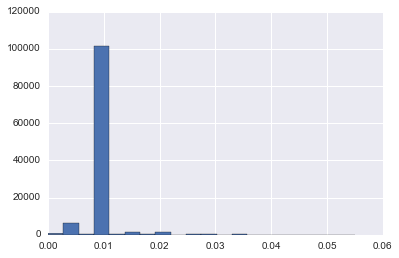

In [22]:
#create closing fee variable - fee that goes to prosper
df['ClosingFeePercent'] = df['BorrowerRate'] - df['LenderYield']
df['ClosingFeePercent'].hist(bins=20)

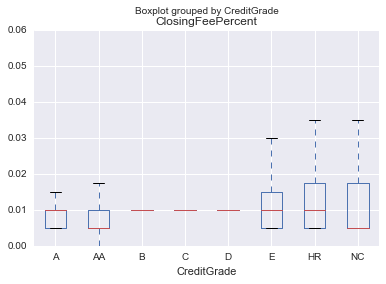

In [23]:
df['ClosingFeeDollar'] = df['ClosingFeePercent'] * df['LoanOriginalAmount']
df.boxplot(column='ClosingFeePercent', by ='CreditGrade')

In [24]:
df['LoanOriginationDate'] =  pd.to_datetime(df['LoanOriginationDate'], format='%Y-%m-%d %H:%M:%S')

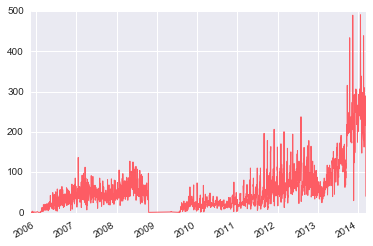

In [25]:
#loan originations by time
df.LoanOriginationDate.value_counts().plot(kind='line', linewidth=1, color='#FD5C64')

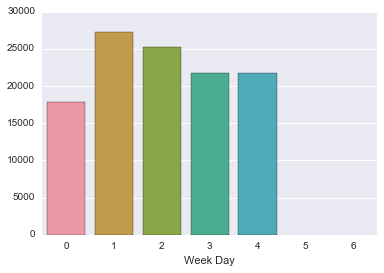

In [26]:
#loan originations by week day
weekdays = []
for date in df.LoanOriginationDate:
    weekdays.append(date.weekday())
weekdays = pd.Series(weekdays)

sns.barplot(x = weekdays.value_counts().index, y=weekdays.value_counts().values, order=range(0,7))
plt.xlabel('Week Day')
sns.despine()

#spike on Tuesdays, none on weekends of course

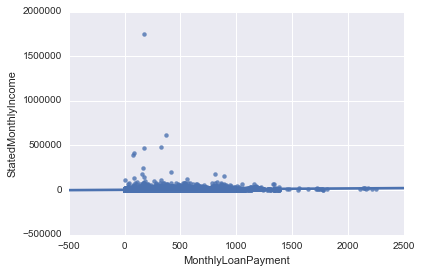

In [27]:
# plot some simple linear regression 


sns.regplot(x='MonthlyLoanPayment', y='StatedMonthlyIncome', data=df)


In [28]:
outliers = df[df.StatedMonthlyIncome > df.StatedMonthlyIncome.std() * 3]
nooutliers = df[~(df.StatedMonthlyIncome > df.StatedMonthlyIncome.std() * 3)]

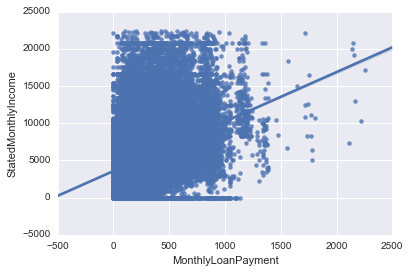

In [29]:
sns.regplot(x='MonthlyLoanPayment', y='StatedMonthlyIncome', data=nooutliers)


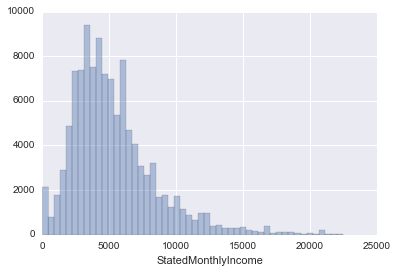

In [30]:
#sns.lmplot(x='MonthlyLoanPayment', y='StatedMonthlyIncome', data=nooutliers, col='LoanStatus', col_wrap=4)
sns.distplot(nooutliers.StatedMonthlyIncome, kde=False)

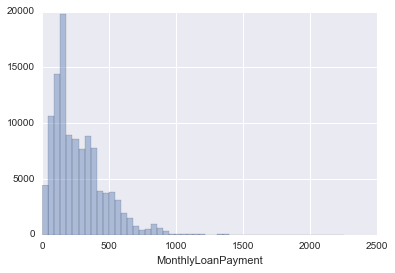

In [31]:
sns.distplot(nooutliers.MonthlyLoanPayment, kde=False)

In [32]:
df.Term.value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

In [33]:
df['Year'] = pd.DatetimeIndex(df['LoanOriginationDate']).year

In [34]:
#create derived variable totalfeedollar
df['TotalFeeDollar'] = df['ClosingFeeDollar'] - df['LP_ServiceFees']

keep = ['TotalFeeDollar', 'LoanOriginationDate', 'Year', 'CreditGrade', 'ProsperScore',\
        'ListingCategory (numeric)','BorrowerState','LoanStatus']
revenue = df[keep]

In [35]:
revenue.head()

,TotalFeeDollar,LoanOriginationDate,Year,CreditGrade,ProsperScore,ListingCategory (numeric),BorrowerState,LoanStatus
0,321.680,2007-09-12,2007,C,NaN,0,CO,Completed
1,100.000,2014-03-03,2014,NaN,7.0,2,CO,Current
2,129.235,2007-01-17,2007,HR,NaN,0,GA,Completed
3,208.010,2012-11-01,2012,NaN,9.0,16,GA,Current
4,210.270,2013-09-20,2013,NaN,4.0,2,MN,Current


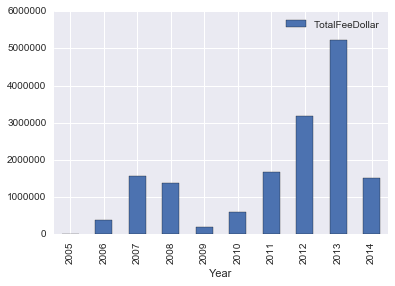

In [36]:
revenue[['TotalFeeDollar', 'Year']].groupby('Year').sum().plot(kind='bar')

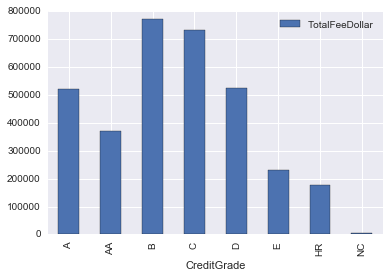

In [37]:
revenue[['TotalFeeDollar', 'CreditGrade']].groupby('CreditGrade').sum().plot(kind='bar')

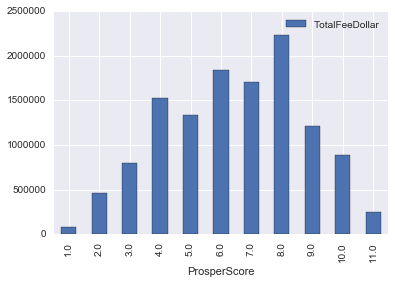

In [38]:
revenue[['TotalFeeDollar', 'ProsperScore']].groupby('ProsperScore').sum().plot(kind='bar')

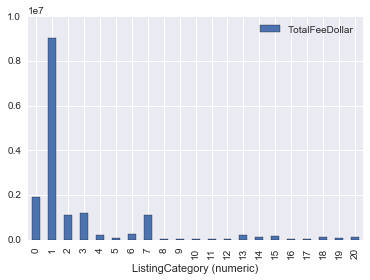

In [39]:
revenue[['TotalFeeDollar', 'ListingCategory (numeric)']].groupby('ListingCategory (numeric)').sum().plot(kind='bar')

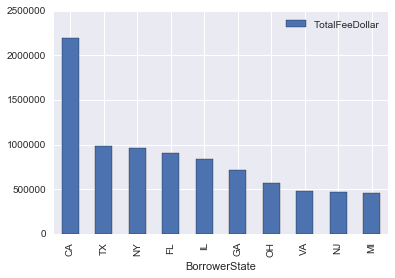

In [40]:
state = revenue[['TotalFeeDollar', 'BorrowerState']].groupby('BorrowerState').sum()
state = state.sort_values(by='TotalFeeDollar', ascending=False) #sorted by revenues
state.head(10).plot(kind='bar') #plot top 10

In [41]:
state2 = revenue.pivot_table(index=['BorrowerState'],values=["TotalFeeDollar"],aggfunc=[np.sum,len], fill_value=0,margins=True)
stackedstate = state2.stack(1).sort_values(by='sum',ascending=False)
stackedstate['FeePerLoan'] = stackedstate['sum']/stackedstate['len']

In [42]:
stackedstate.sort_values(by='FeePerLoan',ascending=False).head(5)
#seems that loans from DC makes the most in fees

,,sum,len,FeePerLoan
BorrowerState,,,,
DC,TotalFeeDollar,66773.0700,382.0,174.798613
MD,TotalFeeDollar,434112.6725,2821.0,153.886094
NH,TotalFeeDollar,84668.0437,551.0,153.662511
MA,TotalFeeDollar,344026.9588,2242.0,153.446458
NJ,TotalFeeDollar,472115.0875,3097.0,152.442715


In [43]:
report = df.pivot_table(values=['ProsperScore'],index=['BorrowerState'], fill_value=0, aggfunc=np.mean)
report.sort_values(by='ProsperScore',ascending=False).head(5) 
#top average prosper score, hypothesize was right DC loans were most credit worthy

,ProsperScore
BorrowerState,
DC,6.786585
IL,6.236867
DE,6.205993
MA,6.180776
GA,6.126382


In [44]:
# DC unfortunately not even in the top 25
df.BorrowerState.value_counts().head(25)

CA    14717
TX     6842
NY     6729
FL     6720
IL     5921
GA     5008
OH     4197
MI     3593
VA     3278
NJ     3097
NC     3084
WA     3048
PA     2972
MD     2821
MO     2615
MN     2318
MA     2242
CO     2210
IN     2078
AZ     1901
WI     1842
OR     1817
TN     1737
AL     1679
CT     1627
Name: BorrowerState, dtype: int64

In [45]:
#gross principal losses by vintage(origination date) and prosper credit score.
df.pivot_table(values=['LP_GrossPrincipalLoss'],index=['Year'],columns=['ProsperScore'], fill_value=0, aggfunc=np.sum)


LP_GrossPrincipalLoss                                            \
ProsperScore                  1.0         2.0         3.0      4.0      5.0    
Year                                                                           
2009                      27879.54     2801.83    11581.32    91549   109294   
2010                      81004.43    61217.99    57413.27   147348   368864   
2011                     497830.93   499044.04   499014.50  1606301  1846459   
2012                     402861.03  1007652.65  1120123.39  1535412  2428590   
2013                       3638.36   414156.56   502092.80   464155   393766   
2014                          0.00        0.00        0.00        0        0   

                                                                 
ProsperScore     6.0      7.0      8.0     9.0        10.0 11.0  
Year                                                             
2009            94648   147233   191421  148390   23667.69    0  
2010           482449   444337   514238  348735   94885.25    0  
2011          1865715  1088931  1568172  537051  118252.22    0  
2012          3052017  2706721  2664818  820880  154914.19    0  
2013           267927   161089   105323   88527   41869.42    0  
2014                0        0        0       0       0.00    0

In [46]:
#this is where we begin to clean up the data, selecting features
#with the purpose of creating a model to predict bad loans


In [47]:
#filter out loans without prosper score, basically older loans
scored = df[~df.ProsperScore.isnull()]

In [48]:
scored = scored[['Term','LoanStatus','ListingCreationDate','BorrowerAPR','ProsperScore', \
                 'EmploymentStatus', 'IsBorrowerHomeowner', 'CurrentDelinquencies', \
                 'StatedMonthlyIncome','LoanOriginalAmount','LoanOriginationDate']]

In [49]:
#scored.apply(lambda x: sum(x.isnull()),axis=0) 
scored.isnull().sum()

Term                    0
LoanStatus              0
ListingCreationDate     0
BorrowerAPR             0
ProsperScore            0
EmploymentStatus        0
IsBorrowerHomeowner     0
CurrentDelinquencies    0
StatedMonthlyIncome     0
LoanOriginalAmount      0
LoanOriginationDate     0
dtype: int64

In [50]:
scored.dtypes

Term                             int64
LoanStatus                      object
ListingCreationDate             object
BorrowerAPR                    float64
ProsperScore                   float64
EmploymentStatus                object
IsBorrowerHomeowner               bool
CurrentDelinquencies           float64
StatedMonthlyIncome            float64
LoanOriginalAmount               int64
LoanOriginationDate     datetime64[ns]
dtype: object

In [51]:
#Simplify loanstatuses  Cancelled Completed Current FinalPaymentInProgress = 0
scored.pivot_table(values=['Term'],index=['LoanStatus'], fill_value=0, aggfunc=len)


,Term
LoanStatus,
Chargedoff,5336
Completed,19664
Current,56576
Defaulted,1005
FinalPaymentInProgress,205
Past Due (1-15 days),806
Past Due (16-30 days),265
Past Due (31-60 days),363
Past Due (61-90 days),313


In [52]:
#scored['LoanStatus'].map(lambda x: 0 if x=='Cancelled' else 1).astype(int)
def isBadLoan(status):
    if any([status == 'Cancelled', status == 'Completed' , \
           status == 'Current', status == 'FinalPaymentInProgress']):
        return 0
    else:
        return 1


In [53]:
scored['isBadLoan'] = scored['LoanStatus'].apply(isBadLoan)
scored.pivot_table(values=['Term'],index=['isBadLoan'], fill_value=0, aggfunc=len)


,Term
isBadLoan,
0,76445
1,8408


In [54]:
#Create derived variable originationtime: # of days from listing to funded
scored['ListingCreationDate'] = pd.to_datetime(scored['ListingCreationDate'])
scored['OriginationTime'] = (scored['LoanOriginationDate'] - scored['ListingCreationDate']).dt.days
scored.head(5)

,Term,LoanStatus,ListingCreationDate,BorrowerAPR,ProsperScore,EmploymentStatus,IsBorrowerHomeowner,CurrentDelinquencies,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,isBadLoan,OriginationTime
1,36,Current,2014-02-27 08:28:07.900,0.12016,7.0,Employed,False,0.0,6125.000000,10000,2014-03-03,0,3
3,36,Current,2012-10-22 11:02:35.010,0.12528,9.0,Employed,True,4.0,2875.000000,10000,2012-11-01,0,9
4,36,Current,2013-09-14 18:38:39.097,0.24614,4.0,Employed,True,0.0,9583.333333,15000,2013-09-20,0,5
5,60,Current,2013-12-14 08:26:37.093,0.15425,10.0,Employed,True,0.0,8333.333333,15000,2013-12-24,0,9
6,36,Current,2013-04-12 09:52:56.147,0.31032,2.0,Employed,False,0.0,2083.333333,3000,2013-04-18,0,5


In [55]:
#Fix employment status
scored.pivot_table(values=['Term'],index=['EmploymentStatus'], fill_value=0, aggfunc=len)


,Term
EmploymentStatus,
Employed,67310
Full-time,7927
Not employed,649
Other,3806
Part-time,256
Retired,367
Self-employed,4538


In [56]:
scored.dtypes


Term                             int64
LoanStatus                      object
ListingCreationDate     datetime64[ns]
BorrowerAPR                    float64
ProsperScore                   float64
EmploymentStatus                object
IsBorrowerHomeowner               bool
CurrentDelinquencies           float64
StatedMonthlyIncome            float64
LoanOriginalAmount               int64
LoanOriginationDate     datetime64[ns]
isBadLoan                        int64
OriginationTime                  int64
dtype: object

In [57]:
scored = scored.drop(['LoanStatus', 'ListingCreationDate','EmploymentStatus','LoanOriginationDate'], axis=1)


In [58]:
scored.dtypes


Term                      int64
BorrowerAPR             float64
ProsperScore            float64
IsBorrowerHomeowner        bool
CurrentDelinquencies    float64
StatedMonthlyIncome     float64
LoanOriginalAmount        int64
isBadLoan                 int64
OriginationTime           int64
dtype: object

In [59]:
scored = scored[['isBadLoan', 'OriginationTime','Term',\
 'BorrowerAPR', 'ProsperScore', 'IsBorrowerHomeowner',\
 'CurrentDelinquencies', 'StatedMonthlyIncome', 'LoanOriginalAmount']]
scored.dtypes

isBadLoan                 int64
OriginationTime           int64
Term                      int64
BorrowerAPR             float64
ProsperScore            float64
IsBorrowerHomeowner        bool
CurrentDelinquencies    float64
StatedMonthlyIncome     float64
LoanOriginalAmount        int64
dtype: object

In [60]:
# train on 75% of random data points
#scored['is_train'] = np.random.uniform(0, 1, len(scored)) <= .75
#train, test = scored[scored['is_train']==True], scored[scored['is_train']==False]
#features = scored.columns[1:9] #skip first and last column
clf = RandomForestClassifier(n_estimators=100)

from sklearn.cross_validation import train_test_split
features = scored.columns[1:9] #skip first column


In [61]:
# Training data features converted to numpy
train_features = scored[features].values
train_target = scored['isBadLoan'].values

# Fit the model to our training data
#clf = clf.fit(train_features, train_target)
#score = clf.score(train_features, train_target)
#"Mean accuracy of Random Forest: {0}".format(score)

# Split 80-20 train vs test data
train_x, test_x, train_y, test_y = train_test_split(train_features, 
                                                    train_target, 
                                                    test_size=0.20, 
                                                    random_state=0)
#print (train_features.shape, train_target.shape)
#print (train_x.shape, train_y.shape)
#print (test_x.shape, test_y.shape)

#fit the model and score it using test data
clf = clf.fit(train_x, train_y)
#clf.score(test_x, test_y)


In [62]:
predict_y = clf.predict(test_x)

from sklearn.metrics import accuracy_score
print ("Random Forest Accuracy Score= %.17f" % (accuracy_score(test_y, predict_y)))

Random Forest Accuracy Score= 0.89393671557362564


In [63]:
test_y.cumsum() #there are 1732 bad loans in test data set

array([   1,    1,    1, ..., 1732, 1732, 1732], dtype=int64)

In [64]:
from sklearn import metrics
#print(clf.feature_importances_)  train_target

#plot feature importance
#http://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html

importances = clf.feature_importances_
# make importances relative to max importance
importances = 100.0 * (importances / importances.max())

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train_x.shape[1]):
    print("%d. feature %s (%.2f)" % (f + 1, features[indices[f]], importances[indices[f]]))


Feature ranking:
1. feature StatedMonthlyIncome (100.00)
2. feature BorrowerAPR (88.36)
3. feature OriginationTime (63.44)
4. feature LoanOriginalAmount (52.23)
5. feature ProsperScore (30.95)
6. feature CurrentDelinquencies (14.90)
7. feature IsBorrowerHomeowner (9.44)
8. feature Term (6.71)


In [65]:
pos = np.arange(indices.shape[0]) + .5
pos = pos[::-1]
# it turns out our derived variable OriginationTime is #3 in importance

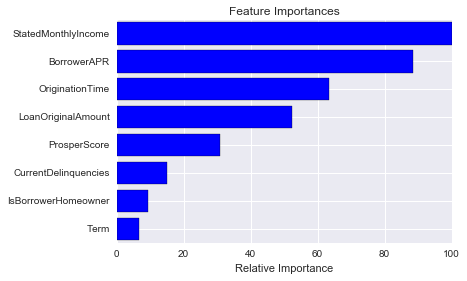

In [66]:
plt.figure(1)
plt.title('Feature Importances')
plt.barh(pos, importances[indices], color='b', align='center')
plt.yticks(pos, features[indices])
plt.xlabel('Relative Importance')


In [67]:
#https://notmatthancock.github.io/2015/10/28/confusion-matrix.html

def show_confusion_matrix(C,class_labels=['0','1']):
    """
    C: ndarray, shape (2,2) as given by scikit-learn confusion_matrix function
    class_labels: list of strings, default simply labels 0 and 1.

    Draws confusion matrix with associated metrics.
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    assert C.shape == (2,2), "Confusion matrix should be from binary classification only."
    
    # true negative, false positive, etc...
    tn = C[0,0]; fp = C[0,1]; fn = C[1,0]; tp = C[1,1];

    NP = fn+tp # Num positive examples
    NN = tn+fp # Num negative examples
    N  = NP+NN

    fig = plt.figure(figsize=(8,8))
    ax  = fig.add_subplot(111)
    ax.imshow(C, interpolation='nearest', cmap=plt.cm.gray)

    # Draw the grid boxes
    ax.set_xlim(-0.5,2.5)
    ax.set_ylim(2.5,-0.5)
    ax.plot([-0.5,2.5],[0.5,0.5], '-k', lw=2)
    ax.plot([-0.5,2.5],[1.5,1.5], '-k', lw=2)
    ax.plot([0.5,0.5],[-0.5,2.5], '-k', lw=2)
    ax.plot([1.5,1.5],[-0.5,2.5], '-k', lw=2)

    # Set xlabels
    ax.set_xlabel('Hypothesized class', fontsize=16)
    ax.set_xticks([0,1,2])
    ax.set_xticklabels(class_labels + [''])
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    # These coordinate might require some tinkering. Ditto for y, below.
    ax.xaxis.set_label_coords(0.34,1.06)

    # Set ylabels
    ax.set_ylabel('True class', fontsize=16, rotation=90)
    ax.set_yticklabels(class_labels + [''],rotation=90)
    ax.set_yticks([0,1,2])
    ax.yaxis.set_label_coords(-0.09,0.65)


    # Fill in initial metrics: tp, tn, etc...
    ax.text(0,0,
            'True Neg: %d\n(Num Neg: %d)'%(tn,NN),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,1,
            'False Neg: %d'%fn,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(1,0,
            'False Pos: %d'%fp,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))


    ax.text(1,1,
            'True Pos: %d\n(Num Pos: %d)'%(tp,NP),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    # Fill in secondary metrics: accuracy, true pos rate, etc...
    ax.text(2,0,
            'False Pos Rate: %.2f'%(fp / (fp+tn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(2,1,
            'True Pos Rate (Recall): %.2f'%(tp / (tp+fn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(2,2,
            'Accuracy: %.2f'%((tp+tn+0.)/N),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,2,
            'Neg Pre Val: %.2f'%(1-fn/(fn+tn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(1,2,
            'Pos Pred Val (Precision): %.2f'%(tp/(tp+fp+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))


    plt.tight_layout()
    plt.show()


In [68]:
confusion_matrix = metrics.confusion_matrix(test_y, predict_y)

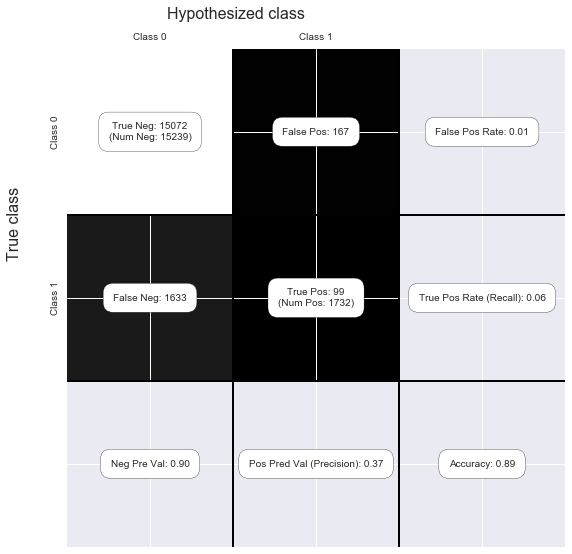

In [69]:
show_confusion_matrix(confusion_matrix, ['Class 0', 'Class 1'])

In [70]:
# Really bad at predicting bad loans. Out of 1732 bad loans, 95 were predicted to be bad by Random Forest.
# Looking at the ROC Curve below, it's not much better than flipping a coin (AUC = .5)

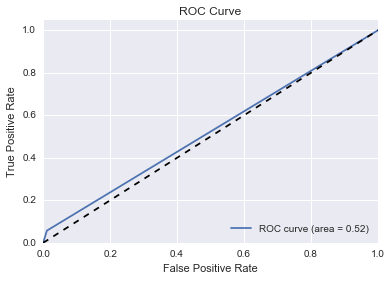

In [71]:
# ROC Curve
fpr, tpr, _ = metrics.roc_curve(test_y, predict_y)
# AUC
auc = metrics.auc(fpr, tpr)

#plt.plot(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

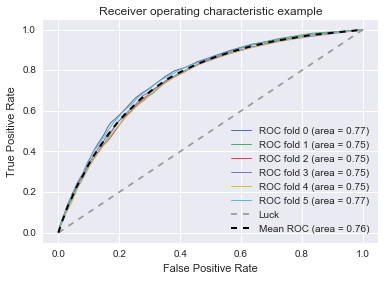

In [77]:
# implement stratified kfold with random forest Classifier
# Run classifier with cross-validation and plot ROC curves
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html
from sklearn import svm, datasets
from sklearn.cross_validation import StratifiedKFold

random_state = np.random.RandomState(0)
train_features = scored[features].values
train_target = scored['isBadLoan'].values

cv = StratifiedKFold(train_target, n_folds=6)
#classifier = svm.SVC(kernel='linear', probability=True,random_state=random_state)
classifier = RandomForestClassifier(n_estimators=100)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas_ = classifier.fit(train_features[train], train_target[train]).predict_proba(train_features[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = metrics.roc_curve(train_target[test], probas_[:, 1])
    mean_tpr += np.interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [78]:
"""
trying out new variables:
EmploymentStatus
EmploymentStatusDuration                      
CreditScoreRangeLower
FirstRecordedCreditLine        
CurrentCreditLines
EstimatedLoss
EstimatedReturn
DelinquenciesLast7Years                


remove:
prosperscore, current delinquencies, isborrowerhomeowner, term

keep:
statedmonthlyincome
borrowerapr
originationtime
loanoriginalamount
"""

'\ntrying out new variables:\nEmploymentStatus\nEmploymentStatusDuration                      \nCreditScoreRangeLower\nFirstRecordedCreditLine        \nCurrentCreditLines\nEstimatedLoss\nEstimatedReturn\nDelinquenciesLast7Years                \n\n\nremove:\nprosperscore, current delinquencies, isborrowerhomeowner, term\n\nkeep:\nstatedmonthlyincome\nborrowerapr\noriginationtime\nloanoriginalamount\n'

In [79]:
second = df[['CreditScoreRangeLower','LoanStatus','ListingCreationDate','BorrowerAPR','FirstRecordedCreditLine', \
                 'EmploymentStatus', 'EmploymentStatusDuration', 'CurrentCreditLines', \
                 'StatedMonthlyIncome','LoanOriginalAmount','LoanOriginationDate', 'EstimatedLoss',\
            'EstimatedReturn','DelinquenciesLast7Years']]

In [80]:
second.isnull().sum()

CreditScoreRangeLower         591
LoanStatus                      0
ListingCreationDate             0
BorrowerAPR                    25
FirstRecordedCreditLine       697
EmploymentStatus             2255
EmploymentStatusDuration     7625
CurrentCreditLines           7604
StatedMonthlyIncome             0
LoanOriginalAmount              0
LoanOriginationDate             0
EstimatedLoss               29084
EstimatedReturn             29084
DelinquenciesLast7Years       990
dtype: int64

In [81]:
second = second[~second.EstimatedLoss.isnull()]

In [82]:
second.isnull().sum()

CreditScoreRangeLower        0
LoanStatus                   0
ListingCreationDate          0
BorrowerAPR                  0
FirstRecordedCreditLine      0
EmploymentStatus             0
EmploymentStatusDuration    19
CurrentCreditLines           0
StatedMonthlyIncome          0
LoanOriginalAmount           0
LoanOriginationDate          0
EstimatedLoss                0
EstimatedReturn              0
DelinquenciesLast7Years      0
dtype: int64

In [83]:
second = second[~second.EmploymentStatusDuration.isnull()]

In [84]:
second.isnull().sum()

CreditScoreRangeLower       0
LoanStatus                  0
ListingCreationDate         0
BorrowerAPR                 0
FirstRecordedCreditLine     0
EmploymentStatus            0
EmploymentStatusDuration    0
CurrentCreditLines          0
StatedMonthlyIncome         0
LoanOriginalAmount          0
LoanOriginationDate         0
EstimatedLoss               0
EstimatedReturn             0
DelinquenciesLast7Years     0
dtype: int64

In [85]:
second.dtypes

CreditScoreRangeLower              float64
LoanStatus                          object
ListingCreationDate                 object
BorrowerAPR                        float64
FirstRecordedCreditLine             object
EmploymentStatus                    object
EmploymentStatusDuration           float64
CurrentCreditLines                 float64
StatedMonthlyIncome                float64
LoanOriginalAmount                   int64
LoanOriginationDate         datetime64[ns]
EstimatedLoss                      float64
EstimatedReturn                    float64
DelinquenciesLast7Years            float64
dtype: object

In [86]:
second['isBadLoan'] = second['LoanStatus'].apply(isBadLoan)

In [87]:
#Create derived variable originationtime: # of days from listing to funded
second['ListingCreationDate'] = pd.to_datetime(second['ListingCreationDate'])
second['OriginationTime'] = (second['LoanOriginationDate'] - second['ListingCreationDate']).dt.days



In [88]:
second.EmploymentStatus.unique()

array(['Employed', 'Other', 'Full-time', 'Self-employed', 'Not employed',
       'Retired', 'Part-time'], dtype=object)

In [89]:
#encoding employment status to numbers
le = preprocessing.LabelEncoder()
second.EmploymentStatus = le.fit_transform(second.EmploymentStatus)

In [90]:
# convert from object to datetime to ordinal
second['FirstRecordedCreditLine'] = pd.to_datetime(second['FirstRecordedCreditLine'])
second.FirstRecordedCreditLine = second.FirstRecordedCreditLine.apply(lambda x: x.toordinal())

In [91]:
second.dtypes

CreditScoreRangeLower              float64
LoanStatus                          object
ListingCreationDate         datetime64[ns]
BorrowerAPR                        float64
FirstRecordedCreditLine              int64
EmploymentStatus                     int64
EmploymentStatusDuration           float64
CurrentCreditLines                 float64
StatedMonthlyIncome                float64
LoanOriginalAmount                   int64
LoanOriginationDate         datetime64[ns]
EstimatedLoss                      float64
EstimatedReturn                    float64
DelinquenciesLast7Years            float64
isBadLoan                            int64
OriginationTime                      int64
dtype: object

In [92]:
second = second.drop(['LoanStatus', 'ListingCreationDate','LoanOriginationDate'], axis=1)

In [93]:
second = second[['isBadLoan', 'CreditScoreRangeLower','OriginationTime','FirstRecordedCreditLine',\
 'BorrowerAPR', 'EmploymentStatus', 'EmploymentStatusDuration',\
 'CurrentCreditLines', 'StatedMonthlyIncome', 'LoanOriginalAmount','EstimatedLoss',\
                'EstimatedReturn', 'DelinquenciesLast7Years']]

In [94]:
second.head(5)

,isBadLoan,CreditScoreRangeLower,OriginationTime,FirstRecordedCreditLine,BorrowerAPR,EmploymentStatus,EmploymentStatusDuration,CurrentCreditLines,StatedMonthlyIncome,LoanOriginalAmount,EstimatedLoss,EstimatedReturn,DelinquenciesLast7Years
1,0,680.0,3,728736,0.12016,0,44.0,14.0,6125.000000,10000,0.0249,0.05470,0.0
3,0,800.0,9,723969,0.12528,0,113.0,5.0,2875.000000,10000,0.0249,0.06000,14.0
4,0,680.0,5,731631,0.24614,0,44.0,19.0,9583.333333,15000,0.0925,0.09066,0.0
5,0,740.0,9,720318,0.15425,0,82.0,21.0,8333.333333,15000,0.0449,0.07077,0.0
6,0,680.0,5,730392,0.31032,0,172.0,10.0,2083.333333,3000,0.1275,0.11070,0.0


In [95]:
features = second.columns[1:13] #skip first column

In [96]:
# Training data features converted to numpy
train_features = second[features].values
train_target = second['isBadLoan'].values
# Split 80-20 train vs test data
train_x, test_x, train_y, test_y = train_test_split(train_features, 
                                                    train_target, 
                                                    test_size=0.20, 
                                                    random_state=0)
clf = clf.fit(train_x, train_y)
predict_y = clf.predict(test_x)
print ("Random Forest Accuracy Score= %.17f" % (accuracy_score(test_y, predict_y)))


Random Forest Accuracy Score= 0.90169151883067133


In [97]:
#plot feature importance
#http://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html

importances = clf.feature_importances_
# make importances relative to max importance
importances = 100.0 * (importances / importances.max())

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train_x.shape[1]):
    print("%d. feature %s (%.2f)" % (f + 1, features[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature FirstRecordedCreditLine (100.00)
2. feature EstimatedReturn (95.89)
3. feature EmploymentStatusDuration (92.63)
4. feature StatedMonthlyIncome (91.74)
5. feature OriginationTime (67.14)
6. feature CurrentCreditLines (66.46)
7. feature BorrowerAPR (65.34)
8. feature LoanOriginalAmount (56.45)
9. feature EstimatedLoss (51.16)
10. feature CreditScoreRangeLower (47.50)
11. feature DelinquenciesLast7Years (36.15)
12. feature EmploymentStatus (15.80)


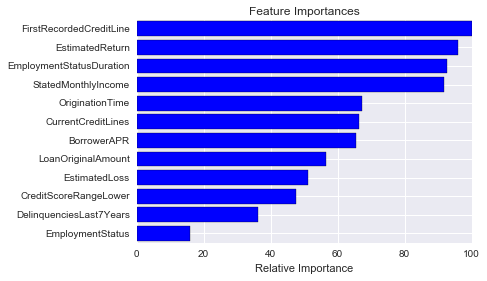

In [98]:

pos = np.arange(indices.shape[0]) + .5
pos = pos[::-1]

plt.figure(1)
plt.title('Feature Importances')
plt.barh(pos, importances[indices], color='b', align='center')
plt.yticks(pos, features[indices])
plt.xlabel('Relative Importance')

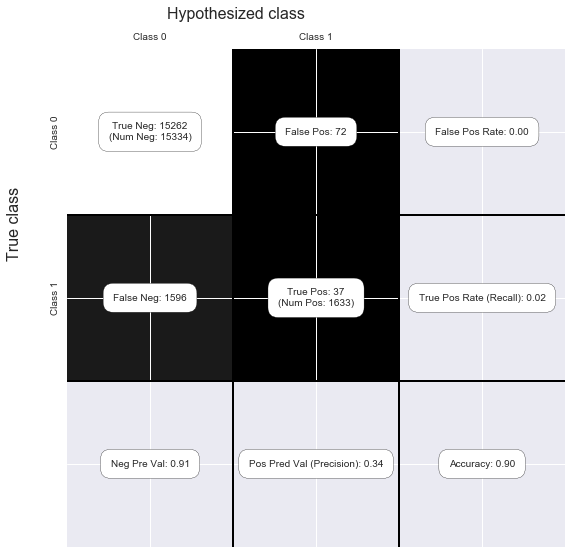

In [99]:
confusion_matrix = metrics.confusion_matrix(test_y, predict_y)
show_confusion_matrix(confusion_matrix, ['Class 0', 'Class 1'])


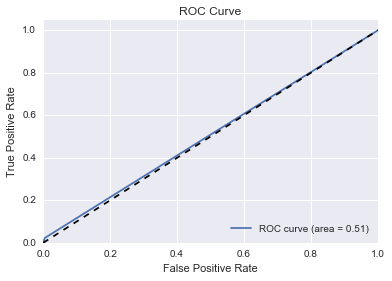

In [100]:
# ROC Curve
fpr, tpr, _ = metrics.roc_curve(test_y, predict_y)
# AUC
auc = metrics.auc(fpr, tpr)

#plt.plot(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()